#### Importing Standard Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Display all the interactive o/p & not only the last o/p
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Reading the Data

In [2]:
columns=['userId', 'productId', 'ratings','timestamp']
df = pd.read_csv('ratings_Electronics.csv', names=columns)
ori_df = df.copy()
df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


#### Dropping the timestamp column

In [3]:
df.drop('timestamp',axis=1,inplace=True)

#### Name of the Variables and Shape of the Data

In [4]:
df.shape

(7824482, 3)

## Data Characteristics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [6]:
df.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

##### Observation
- The Dataset consists of 3 variables with 7824482 rows
- UserId & ProductId are of datatype as object & the rating column is of type float
- There are no missing values in the dataset
- We will further make the dataset less sparse so that we can process it & don't face any memory issue.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


##### Since the dataset is very huge. We will only consider 10% of the whole dataset.

#### Creating Subset of Original Dataset

In [8]:
# Taking 10% of the original dataset
rows=round(df.shape[0]/10)
df=df.iloc[:rows,0:]

In [9]:
df.shape

(782448, 3)

#### Users & Products

In [10]:
print('Number of unique users in small subset of data = ', df.userId.nunique())
print('Number of unique product in small subset of data = ', df.productId.nunique())

Number of unique users in small subset of data =  606149
Number of unique product in small subset of data =  47105


In [11]:
def PlotRatings(d):
    sns.countplot("ratings", data=d)
    for i in range(1,6):
        print("Total {0:d} rating is {1:d}".format(i, d[d.ratings == i].ratings.count()))

Total 1 rating is 94850
Total 2 rating is 46287
Total 3 rating is 61794
Total 4 rating is 154719
Total 5 rating is 424798


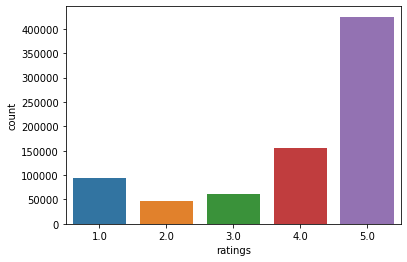

In [12]:
PlotRatings(df)

##### Observations
- As expected, Ratings columns has Minimum of 1 rating & Maximum of 5 rating
- Most of the users have given the rating as 5, more than 55% of the users
- Least number of users have given the rating as 2, less than 6% of the users

### Subset of Dataset to make it less sparse

In [13]:
mostRated = df.groupby('userId').ratings.size().sort_values(ascending=False)[:20]
print('Top 20 users based on ratings: \n', mostRated)

Top 20 users based on ratings: 
 userId
A5JLAU2ARJ0BO     384
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    163
A6FIAB28IS79      113
AT6CZDCP4TRGA     112
AKT8TGIT6VVZ5     108
A11D1KHM7DVOQK    106
A2B7BUH8834Y6M     98
A2AEZQ3DGBBLPR     81
A2R6RA8FRBS608     79
AGHZXQL9F94T9      74
A203OCQQ12MAVT     73
A1F9Z42CFF9IAY     68
A1MJMYLRTZ76ZX     68
A3OXHLG6DIBRW8     67
A149RNR5RH19YY     65
A12DLJESJKM1OQ     64
A1JWSDDIH5Z7DV     64
A1FR68QH6Z4YZM     64
ABH9D1TEOJ56E      64
Name: ratings, dtype: int64


### To make the dataset less sparse we will keep only those users who has given 50 or more number of ratings

In [14]:
counts = df.userId.value_counts()
df = df[df.userId.isin(counts[counts > 50].index)]
df.shape

(2450, 3)

##### The no. of records has come down drastically to around 2450 records which seems good for further processing

In [15]:
print('Number of unique users in Final dataset = ', df.userId.nunique())
print('Number of unique product in Final dataset = ', df.productId.nunique())

Number of unique users in Final dataset =  25
Number of unique product in Final dataset =  2125


##### Observation: In the less sparse / final dataset, we have 25 unique users and 2125 unique products

Total 1 rating is 143
Total 2 rating is 155
Total 3 rating is 230
Total 4 rating is 575
Total 5 rating is 1347


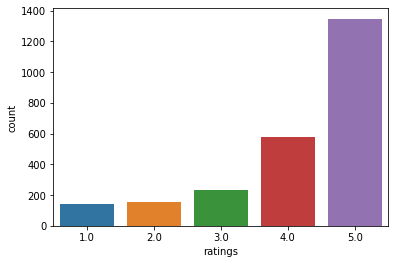

In [16]:
PlotRatings(df)

##### Observations: 
- The trend continues as in the original dataset
- Most of the users have given the rating as 5, more than 55% of the users

#### Storing the Processed dataset

In [17]:
processedData = df.copy()

#### Rating Analysis of Final Dataset

In [18]:
#constructing the pivot table
ratingsMatrix = df.pivot(index='userId', columns='productId', values='ratings').fillna(0)
ratingsMatrix.head(25)
print('Shape of the Rating Matrix: ', ratingsMatrix.shape)

actualRatings = np.count_nonzero(ratingsMatrix)
print('Number of Actual Ratings (non-zero values) = ', actualRatings)

totalRatings = ratingsMatrix.shape[0] * ratingsMatrix.shape[1]
print('Total possible number of Ratings = ', totalRatings)

density = (actualRatings/totalRatings) * 100
print ('Density of Rating Matrix: {:4.2f}%'.format(density))

productId,1400532655,B000000O48,B000001OL6,B000001OMN,B00000J05A,B00000J061,B00000J0E8,B00000J1E6,B00000J1EP,B00000J1G6,...,B000BQ57BU,B000BQ7GW8,B000BQVYIA,B000BSLTIS,B000BSLTMY,B000BSOBG0,B000BTFZZA,B000BTL0OA,B000BTPVHW,B000BTQXUG
userId,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DLJESJKM1OQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
A1F9Z42CFF9IAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1FR68QH6Z4YZM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1JWSDDIH5Z7DV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1MJMYLRTZ76ZX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1RPTVW5VEOSI,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
A203OCQQ12MAVT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Shape of the Rating Matrix:  (25, 2125)
Number of Actual Ratings (non-zero values) =  2450
Total possible number of Ratings =  53125
Density of Rating Matrix: 4.61%


##### Observations
- The density value of the matrix shows that it is a sparse matrix. The density is just **4.61%**
- Hence, we can see many cells filled with 0 values (Nan replaced with 0) in the matrix.
- In the final dataset we have
    - **25 unique users**
    - **2125 unique products**
    
- Also, we can Transpose the rating matrix to be used for **Item based collaborative filtering** wherein the matrix will have one row per product & one column per user.

### Splitting Data into Train & Test Dataset

In [19]:
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(df, test_size = 0.3, random_state=41)
print('Shape of Training data: ',trainData.shape)
print('Shape of Testing data: ',testData.shape)

Shape of Training data:  (1715, 3)
Shape of Testing data:  (735, 3)


### Popularity Recommender Model
#### Recommender Method
Recommend the most popular items to the user
- **data** - Dataset consisting of Users, Products & Ratings information
- **k** - Number of recommendations to be done to the user
- **uid** - The user for which we need to recommend products

In [20]:
def PopularityRecommender(data, k, uid):
    # Count of user_id for each unique product as recommendation score 
    dataGrp = data.groupby('productId').agg({'userId': 'count'}).reset_index()
    dataGrp.rename(columns = {'userId': 'score'},inplace=True)
    
    #Sort the products on recommendation score 
    dataSorted = dataGrp.sort_values(['score', 'productId'], ascending = [False, True]) 

    #Generate a recommendation rank based upon score 
    dataSorted['rank'] = dataSorted['score'].rank(ascending=False, method='first')

    # Get the top k recommendations 
    recommendations = dataSorted.head(k)
    
    # Add user_id column for which the recommendations are being generated 
    recommendations.insert(0, 'userId', uid)
    
    return recommendations

#### Popularity Recommendation on the Final Dataset

In [21]:
# Random list of User Ids
userList = [2, 4, 10, 15]
for i in userList:
    print("List of recommendations for User Id: ", i)
    PopularityRecommender(df, 5, i)

List of recommendations for User Id:  2


,userId,productId,score,rank
113,2,B00004SB92,6,1.0
1080,2,B00008OE6I,5,2.0
358,2,B00005AW1H,4,3.0
600,2,B0000645C9,4,4.0
957,2,B00007KDVI,4,5.0


List of recommendations for User Id:  4


,userId,productId,score,rank
113,4,B00004SB92,6,1.0
1080,4,B00008OE6I,5,2.0
358,4,B00005AW1H,4,3.0
600,4,B0000645C9,4,4.0
957,4,B00007KDVI,4,5.0


List of recommendations for User Id:  10


,userId,productId,score,rank
113,10,B00004SB92,6,1.0
1080,10,B00008OE6I,5,2.0
358,10,B00005AW1H,4,3.0
600,10,B0000645C9,4,4.0
957,10,B00007KDVI,4,5.0


List of recommendations for User Id:  15


,userId,productId,score,rank
113,15,B00004SB92,6,1.0
1080,15,B00008OE6I,5,2.0
358,15,B00005AW1H,4,3.0
600,15,B0000645C9,4,4.0
957,15,B00007KDVI,4,5.0


#### Popularity Recommendation only on the Training Dataset

In [22]:
# Evaluating the Popularity Recommendation System against the first five users of Test Data
userList = testData['userId'][0:4]
for i in userList:
    print("List of recommendations for User Id: ", i)
    PopularityRecommender(trainData, 5, i)

List of recommendations for User Id:  A5JLAU2ARJ0BO


,userId,productId,score,rank
437,A5JLAU2ARJ0BO,B0000645C9,4,1.0
793,A5JLAU2ARJ0BO,B00008OE5G,4,2.0
1463,A5JLAU2ARJ0BO,B0009RKL5S,4,3.0
82,A5JLAU2ARJ0BO,B00004SB92,3,4.0
208,A5JLAU2ARJ0BO,B000050AQ7,3,5.0


List of recommendations for User Id:  ABH9D1TEOJ56E


,userId,productId,score,rank
437,ABH9D1TEOJ56E,B0000645C9,4,1.0
793,ABH9D1TEOJ56E,B00008OE5G,4,2.0
1463,ABH9D1TEOJ56E,B0009RKL5S,4,3.0
82,ABH9D1TEOJ56E,B00004SB92,3,4.0
208,ABH9D1TEOJ56E,B000050AQ7,3,5.0


List of recommendations for User Id:  A1F9Z42CFF9IAY


,userId,productId,score,rank
437,A1F9Z42CFF9IAY,B0000645C9,4,1.0
793,A1F9Z42CFF9IAY,B00008OE5G,4,2.0
1463,A1F9Z42CFF9IAY,B0009RKL5S,4,3.0
82,A1F9Z42CFF9IAY,B00004SB92,3,4.0
208,A1F9Z42CFF9IAY,B000050AQ7,3,5.0


List of recommendations for User Id:  A2AEZQ3DGBBLPR


,userId,productId,score,rank
437,A2AEZQ3DGBBLPR,B0000645C9,4,1.0
793,A2AEZQ3DGBBLPR,B00008OE5G,4,2.0
1463,A2AEZQ3DGBBLPR,B0009RKL5S,4,3.0
82,A2AEZQ3DGBBLPR,B00004SB92,3,4.0
208,A2AEZQ3DGBBLPR,B000050AQ7,3,5.0


#### Inference: 
- Since it is a Popularity recommender model, all the different users are given the same recommendations. 
- In this model we predict the products based on the popularity & not on a particular user. Hence all users are recommended the same products depending on the dataset.
- It is a non-personalized recommender model.

### Collaborative Filtering Recommender Model

#### User Based Collaborative Filtering Recmmender Model
We can create this model using following approach
1. Clustered based algorithm like KNN Algorithm using Surprise Package
2. Matrix Factorization based algorithm like SVD.

We will be using the second approach i.e Matrix Factorization with & without Surprise Package. It will also assist in finding TOP K Recommendations.

In [23]:
data = ratingsMatrix.copy()

# Define User Index for the pivoted matrix of UserId & ProductId with Ratings
data['userIndex'] = np.arange(0, data.shape[0], 1)

# Setting the index on the data
data.set_index(['userIndex'], inplace=True)

#Actual Ratings given by users
data

productId,1400532655,B000000O48,B000001OL6,B000001OMN,B00000J05A,B00000J061,B00000J0E8,B00000J1E6,B00000J1EP,B00000J1G6,...,B000BQ57BU,B000BQ7GW8,B000BQVYIA,B000BSLTIS,B000BSLTMY,B000BSOBG0,B000BTFZZA,B000BTL0OA,B000BTPVHW,B000BTQXUG
userIndex,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Single Value Decomposition
Since it is a sparse matrix we will use SVD for decomposition. SVD is useful in many tasks, such as data compression, noise reduction etc

In [24]:
from scipy.sparse.linalg import svds

U, sigma, Vt = svds(data, k = 10)

# As Sigma is not a diagonal matrix. Converting it to a diagonal array
sigma = np.diag(sigma)

print('Left singular matrix: \n',U)
print('\nSigma matrix: \n',sigma)
print('\nRight singular matrix: \n',Vt)

Left singular matrix: 
 [[ 3.13900857e-02  3.87770544e-02  1.22910263e-02  7.78912752e-02
   1.11511650e-02  2.90902077e-02 -7.82370513e-04 -1.55416630e-04
   3.55722178e-03  1.10207077e-02]
 [ 3.12375272e-01 -6.72132065e-01  1.35139313e-02  1.04161498e-01
  -1.06154077e-03  4.34812306e-02  8.15150319e-05  5.77953158e-03
  -1.67428534e-02  3.04233559e-02]
 [ 1.35980259e-02 -6.45714587e-03 -1.27756776e-02  4.63211062e-06
  -2.29778364e-02  5.17929952e-02 -1.96780518e-04 -4.64546991e-05
  -9.89997316e-03  7.69033239e-03]
 [ 2.25414180e-03 -9.86163583e-02  9.51541489e-02  4.24378548e-02
   3.03229860e-02  8.04870997e-02 -1.93993650e-02 -3.04995535e-03
  -2.06397880e-02  1.76289614e-02]
 [ 5.67016391e-02 -7.65785952e-02  3.66440875e-03  4.15628406e-02
   3.83719415e-03  2.99428341e-02 -1.59896768e-01 -1.65346869e-02
  -7.30738998e-03  2.50418090e-02]
 [ 1.29798872e-02  3.33630729e-02  9.62375313e-01 -1.70173330e-01
   5.97594948e-03  1.02494145e-01 -3.66766510e-03  3.56405160e-03
  -1.4249

#### Predicted Ratings

In [25]:
predRatings = np.dot(np.dot(U, sigma), Vt)

# Convert it to a DataFrame
predData = pd.DataFrame(predRatings, columns = data.columns).fillna(0)
predData

productId,1400532655,B000000O48,B000001OL6,B000001OMN,B00000J05A,B00000J061,B00000J0E8,B00000J1E6,B00000J1EP,B00000J1G6,...,B000BQ57BU,B000BQ7GW8,B000BQVYIA,B000BSLTIS,B000BSLTMY,B000BSOBG0,B000BTFZZA,B000BTL0OA,B000BTPVHW,B000BTQXUG
0,0.010826,0.007760,0.342635,0.019625,0.021007,0.000561,0.062515,0.001552,0.342635,0.009812,...,0.056665,0.146914,0.073806,0.059045,0.428294,0.059045,-0.012960,0.006600,0.000336,0.059045
1,-0.008925,-0.152159,-0.413322,-0.012901,0.009798,0.098246,-0.229558,-0.030432,-0.413322,-0.006451,...,-0.001521,-0.389306,0.223844,0.179075,-0.516653,0.179075,-0.088343,0.055457,0.058948,0.179075
2,0.003785,-0.001594,0.022128,0.002640,0.168756,-0.000327,0.044004,-0.000319,0.022128,0.001320,...,0.288829,0.041462,0.019423,0.015538,0.027661,0.015538,-0.005467,0.018788,-0.000196,0.015538
3,0.005331,-0.024942,0.062517,0.007076,0.118059,0.039351,0.004786,-0.004988,0.062517,0.003538,...,0.207428,0.241387,0.066394,0.053115,0.078146,0.053115,0.036378,0.016339,0.023611,0.053115
4,0.014623,-0.017872,0.076242,0.006769,0.054342,0.015440,0.005739,-0.003574,0.076242,0.003384,...,0.119817,0.123916,0.064903,0.051922,0.095303,0.051922,0.762695,0.014894,0.009264,0.051922
5,-0.000478,-0.038817,-0.074148,0.006695,0.010768,0.213100,-0.123859,-0.007763,-0.074148,0.003348,...,0.016990,-0.154509,-0.048722,-0.038978,-0.092685,-0.038978,-0.003962,-0.034855,0.127860,-0.038978
6,-0.011931,-0.045861,1.137110,0.061949,0.020143,0.041542,0.099127,-0.009172,1.137110,0.030974,...,0.009710,0.306942,0.359171,0.287337,1.421388,0.287337,0.046990,0.033986,0.024925,0.287337
7,0.004380,-0.005117,-0.025187,0.000224,-0.012294,0.015759,-0.014002,-0.001023,-0.025187,0.000112,...,-0.011729,0.077057,0.007283,0.005827,-0.031483,0.005827,-0.008156,-0.000327,0.009456,0.005827
8,0.001930,-0.051700,-0.166280,-0.035806,0.002658,-0.004661,-0.155989,-0.010340,-0.166280,-0.017903,...,0.008289,-0.197485,-0.096953,-0.077562,-0.207850,-0.077562,-0.009183,-0.041485,-0.002797,-0.077562
9,-0.001602,0.210593,-0.013195,-0.006247,-0.014235,0.046154,0.125897,0.042119,-0.013195,-0.003124,...,-0.026929,0.118901,-0.040220,-0.032176,-0.016494,-0.032176,-0.001613,0.040624,0.027692,-0.032176


### Evaluate the Collaborative Recommendation model

In [26]:
# Average Actual rating for each product
ratingsMatrix.mean().head()

# Average Predicted rating for each product 
predData.mean().head()

productId
1400532655    0.04
B000000O48    0.20
B000001OL6    0.16
B000001OMN    0.08
B00000J05A    0.12
dtype: float64

productId
1400532655    0.042455
B000000O48   -0.004786
B000001OL6    0.207055
B000001OMN    0.014730
B00000J05A    0.142681
dtype: float64

In [27]:
# Concat into a single DataFrame
rmseData = pd.concat([ratingsMatrix.mean(), predData.mean()], axis = 1)
rmseData.columns = ['Avg Actual Ratings', 'Avg Predicted Ratings']
rmseData

,Avg Actual Ratings,Avg Predicted Ratings
productId,,
1400532655,0.04,0.042455
B000000O48,0.20,-0.004786
B000001OL6,0.16,0.207055
B000001OMN,0.08,0.014730
B00000J05A,0.12,0.142681
...,...,...
B000BSOBG0,0.16,0.068347
B000BTFZZA,0.20,0.212795
B000BTL0OA,0.20,0.022565


In [28]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(rmseData['Avg Actual Ratings'], rmseData['Avg Predicted Ratings']))
print('\nRoot Mean Squared Error of SVD Model = {} \n'.format(round(rmse,5)))


Root Mean Squared Error of SVD Model = 0.08306 



### SVD using Surprise Package

In [29]:
from surprise import Dataset,Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(1, 5))
ds = Dataset.load_from_df(df[['userId', 'productId', 'ratings']], reader)

In [30]:
trainds, testds = train_test_split(ds, test_size=.3, random_state=41)

In [31]:
svd = SVD(n_factors=50, biased=False)
svd.fit(trainds)

In [32]:
pred = svd.test(testds)
print('\nRoot Mean Squared Error of SVD Model (using Surprise Package) = {} \n'.format(round(accuracy.rmse(pred),5)))

RMSE: 1.7379

Root Mean Squared Error of SVD Model (using Surprise Package) = 1.73788 



In [33]:
cross_validate(svd, ds, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.7360  1.8977  1.7222  1.7365  1.7968  1.7778  0.0652  
MAE (testset)     1.3129  1.4392  1.2827  1.3372  1.3605  1.3465  0.0531  
Fit time          0.12    0.11    0.13    0.13    0.14    0.13    0.01    
Test time         0.02    0.00    0.01    0.00    0.00    0.01    0.00    


{'test_rmse': array([1.73597621, 1.89771931, 1.72222191, 1.73651961, 1.79680161]),
 'test_mae': array([1.31287924, 1.43917187, 1.28267796, 1.33717839, 1.36046099]),
 'fit_time': (0.124969482421875,
  0.1089773178100586,
  0.12692666053771973,
  0.13391923904418945,
  0.13592195510864258),
 'test_time': (0.015623092651367188,
  0.0039980411529541016,
  0.0069963932037353516,
  0.0039980411529541016,
  0.0029985904693603516)}

##### Observations
- We derived the following while evaluating the Collaborative Filtering model
    - RMSE of the SVD Model is around 0.0830
    - RMSE of the SVD Model with Surprise Package is around 1.7378
    - RMSE of the SVD Model with Surprise Package post running 5-fold cross validation is around 1.7778

##### List of Prediction carried out on the test data is shown below. It will help us to predict what rating a user will potentially give to a product that he has never rated before. 

In [34]:
pred

[Prediction(uid='AT6CZDCP4TRGA', iid='B00003CWA3', r_ui=3.0, est=4.1755102040816325, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A203OCQQ12MAVT', iid='B000AAJ2CW', r_ui=5.0, est=4.1755102040816325, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A5JLAU2ARJ0BO', iid='B000066E70', r_ui=5.0, est=1, details={'was_impossible': False}),
 Prediction(uid='A5JLAU2ARJ0BO', iid='B0000643XU', r_ui=5.0, est=4.1755102040816325, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A6FIAB28IS79', iid='B0007OWASE', r_ui=5.0, est=4.1755102040816325, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A3OXHLG6DIBRW8', iid='B000B1H89E', r_ui=4.0, est=4.1755102040816325, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A5JLAU2ARJ0BO', iid='B0000VD3LC', r_ui=1.0, est=4.1755102040816325, details={'was_i

### Getting top - K ( K = 5) recommendations.
#### Recommender Method
Recommend the items with the highest predicted ratings
- **actual** - Actual rating matrix between users & products
- **pred** - Predicted rating matrix between users & products (using SVD)
- **k** - Number of recommendations to be done to the user
- **uid** - The user for which we need to recommend products

In [35]:
def CFRecommender(actual, pred, k, uid):
    # index starts at 0  
    idx = uid - 1
    
    # Sort the actual ratings in descending order
    sortedRatings = actual.iloc[idx].sort_values(ascending=False)
    
    # Sort the predictions in descending order
    sortedPreds = pred.iloc[idx].sort_values(ascending=False)
    
    # Concat into a single DataFrame
    op = pd.concat([sortedRatings, sortedPreds], axis=1)
    op.index.name = 'Recommended Items'
    op.columns = ['Ratings', 'Predictions']
    op = op.loc[op.Ratings == 0]   
    op = op.sort_values('Predictions', ascending=False)
    print(op.head(k))

##### Top 5 Recommendations using User based Collaborative Filtering

In [36]:
# List of User Indexes supplied for getting recommendations. Can't give index > no. of users i.e. > 25
userList = [2, 4, 10, 15]
for i in userList:
    print("\nList of recommendations for User Id: ", i)
    CFRecommender(data, predData, 5, i)


List of recommendations for User Id:  2
                   Ratings  Predictions
Recommended Items                      
B0000DB4D1             0.0     2.761293
B00006J6RN             0.0     2.134272
B0000CBJ8J             0.0     2.013249
B00009W5FF             0.0     1.880614
B000093UU4             0.0     1.782368

List of recommendations for User Id:  4
                   Ratings  Predictions
Recommended Items                      
B00008OE5G             0.0     0.809985
B00008K4BD             0.0     0.783269
B0000UA3MA             0.0     0.646731
B000067VKY             0.0     0.629762
B000087LII             0.0     0.629762

List of recommendations for User Id:  10
                   Ratings  Predictions
Recommended Items                      
B00005T3DP             0.0     0.356850
B00005N5XO             0.0     0.288691
B00004YNWQ             0.0     0.288691
B000065V15             0.0     0.288691
B000063LGR             0.0     0.288691

List of recommendations for User Id

##### Observation: All the 4 users are given different recommendations of products bases on their past behaviour

### Summarising Insights

- The Popularity based recommender system is a non-personalised recommender system and these are based on frequecy counts, which may be not suitable to the user. We can see that for different users, The Popularity based model has recommended the same set of 5 products to all users but in case of Collaborative Filtering based system the model has recommended entire different list based on the user past purchase history.
- Popularity based recommender system is useful whenever a new user logs into the website because it will ensure that there is some recommendation given to the user even though there is no history available for that user. It will recommend the best products on the website. But it fails to provide personalised recommendations.
- User-based Collaborative Filtering is a personalised recommender system. Here the recommendations are based on the past behavior of the user and it is not dependent on any additional information. But, it fails in case of new user as no past data of the user is available which makes it difficult to recommend products.
- A Hybrid recommender system could be preferred over each of these models individually. It could be a combination of Popularity based & Collaborative Filtering based recommender system thus ensuring that the problem area of one model is handled by other model and vice versa.